# **Actividad 2 - Bootcamp Datascience**
### **Presentado por: Rafael Cipagauta Carvajal**
### **Contexto:**
La siguiente actividad fue realizada con información de los datasets obtenidos en el Ejercicio 1, esta, consta de la información de unos préstamos depositados por la operación de México. El objetivo principal del análisis es determinar si existe alguna relación entre la información de ubicación de los solicitantes, edad, o información laboral y el comportamiento de pago de estas obligaciones.
### **Variables de interés:**
Dentro de las variables que encontraremos dentro del dataset se podrán encontrar:

**- Código Formulario:** Es la identificación del documento que diligenció el cliente al momento de su solicitud.

**-	Codigo Préstamo:** Es la identificación de cada préstamo depositado.

**-	Fecha de creación:** Fecha de creación del formulario.

**-	Alcaldia/Municipio, Colonia, Ciudad MX, Calle, Codigo Postal:** Información que diligenció el solicitante que nos indica en qué parte de Mexico habita.

**-	Ingreso Neto, Listed Weeks, ScoreFisValor, Con trabajo actual, Total jobs, Year Since Last Job:** Es información del cliente acerca de su situación laboral, es importante ya que nos puede permitir evaluar el nivel de riesgo del solicitante.

**-	Fecha de creación del préstamo:** Fecha en la que se creó el préstamo.

**-Fecha de nacimiento, Edad cliente:** Información del cliente referente a edad.

**-	Mora máxima, Rango Mora, Estatus préstamo:** Información del préstamo, sus días de mora, en qué rango se encuentran estos días y su estado actual (pagado, pendiente, o contracargo).


In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
%pwd

'c:\\Users\\Rafael\\Desktop\\Bootcamp Data Science - BIT\\Ejercicios_Bootcamp_DS\\E2'

In [4]:
ruta="c:\\Users\\Rafael\\Desktop\\Bootcamp Data Science - BIT\\Ejercicios_Bootcamp_DS\\E1\\"
tabla=pd.read_csv(ruta+'Dataset Bootcamp_Final.csv',sep=';',encoding='utf-8')
tabla.head()

,Código Formulario,Codigo Prestamo,Fecha de creación,Alcaldia/Municipio,Colonia,Ciudad MX,Calle,Codigo Postal,Ingreso Neto,Trully Listed Weeks,ScoreFisValor,Con trabajo actual,Total jobs,Year Since Last Job,Fecha de creación del préstamo,Fecha de nacimiento,Edad cliente,Mora máxima,Rango Mora,Estatus préstamo
0,FORM-392881,P-034842,7/12/2024,TECÁMAC,HUEYOTENCO,MÉXICO,Michoacan,55749.0,"MXN50.328,01",NaN,539.0,NaN,NaN,NaN,7/12/2024,25/10/1992,32,-30,Sin mora,Pendiente
1,FORM-392857,P-034840,7/12/2024,CUAUHTÉMOC,EX-HIPÓDROMO DE PERALVILLO,CIUDAD DE MÉXICO,Enrique Granados 151A,6250.0,"MXN22.461,92",NaN,NaN,NaN,NaN,NaN,7/12/2024,5/07/1989,35,-30,Sin mora,Pendiente
2,FORM-392873,P-034841,7/12/2024,ETCHOJOA,EL CRUCERO,SONORA,Miguel hidalgo 233,85280.0,"MXN9.342,84",NaN,NaN,NaN,NaN,NaN,7/12/2024,17/04/1995,29,-30,Sin mora,Pendiente
3,FORM-392928,P-034845,7/12/2024,JIUTEPEC,SAN FRANCISCO TEXCALPA,MORELOS,Naranjo mzna 21 lote 28,62573.0,"MXN22.900,28",NaN,595.0,NaN,NaN,NaN,7/12/2024,24/02/1977,47,-30,Sin mora,Pendiente
4,FORM-392917,P-034843,7/12/2024,NAUCALPAN DE JUÁREZ,SAN BARTOLO NAUCALPAN (NAUCALPAN CENTRO),MÉXICO,Avenida Gustavo Baz #31,53000.0,"MXN7.038,72",NaN,NaN,NaN,NaN,NaN,7/12/2024,15/11/1983,41,-30,Sin mora,Pendiente


In [5]:
tabla['Fecha de creación'] = pd.to_datetime(tabla['Fecha de creación'], format='%d/%m/%Y')

In [6]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31167 entries, 0 to 31166
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Código Formulario               31167 non-null  object        
 1   Codigo Prestamo                 31167 non-null  object        
 2   Fecha de creación               31167 non-null  datetime64[ns]
 3   Alcaldia/Municipio              31165 non-null  object        
 4   Colonia                         31165 non-null  object        
 5   Ciudad MX                       31161 non-null  object        
 6   Calle                           31165 non-null  object        
 7   Codigo Postal                   31165 non-null  float64       
 8   Ingreso Neto                    30922 non-null  object        
 9   Trully Listed Weeks             5477 non-null   float64       
 10  ScoreFisValor                   15791 non-null  float64       
 11  Co

Con ayuda de **Matplotlib** construiremos una tabla de frecuencias para ver la repartición por Estado de los préstamos.

<Axes: title={'center': 'Frecuencia Estados'}, xlabel='Estado', ylabel='Frecuencia'>

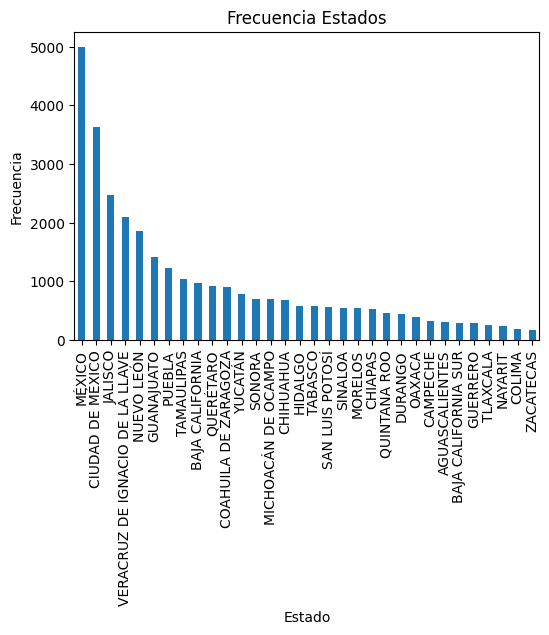

In [7]:
tabla['Ciudad MX'].value_counts()[0:100].plot(kind='bar',figsize=(6,4),xlabel='Estado',ylabel='Frecuencia',title='Frecuencia Estados')

In [8]:
tabla['Ingreso Neto Numérico'] = (
    tabla['Ingreso Neto']
    .str.replace('MXN', '', regex=False)  # Elimina 'MXN'
    .str.replace('.', '', regex=False)   # Elimina los puntos
    .str.replace(',', '.', regex=False)  # Cambia comas por puntos
    .astype(float)                       # Convierte a float
)

Utilizando seaborn crearemos la primera gráfica que mostrará el comportamiento de la variable **Ingreso Neto Numérico** para determinar su distribución:

<Axes: xlabel='Ingreso Neto Numérico', ylabel='Density'>

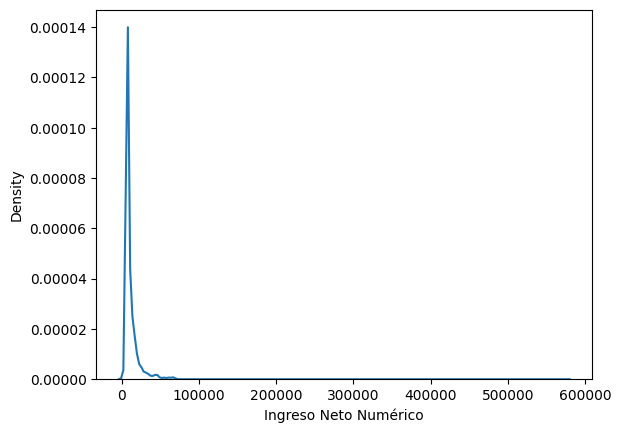

In [9]:
sns.kdeplot(data=tabla, x='Ingreso Neto Numérico')

Ahora, utilizando seaborn crearemos un diagrama de caja y bigotes también sobre la variable **Ingreso Neto Numérico** para determinar su concentración y valores atípicos para quitarlos más adelante:

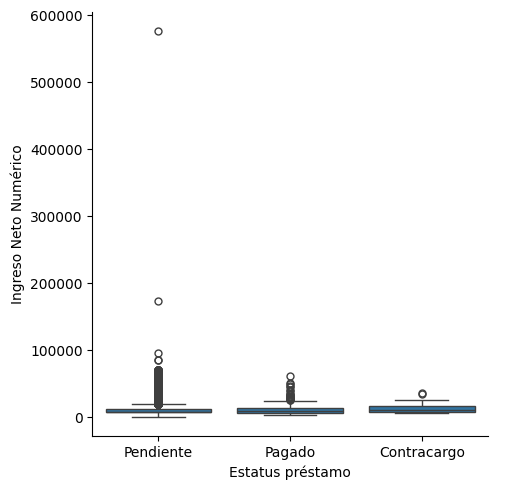

In [10]:
sns.catplot(data=tabla, x='Estatus préstamo',y='Ingreso Neto Numérico',kind='box')

In [11]:
tabla['Ingreso Neto Numérico'].value_counts()

Ingreso Neto Numérico
7500.00     6628
5255.00      644
6791.20      369
5659.00      297
6225.44      282
            ... 
11172.00       1
10047.00       1
10780.00       1
6950.00        1
21344.00       1
Name: count, Length: 10127, dtype: int64

In [12]:
tabla['Ingreso Neto Numérico'].describe()

count     30922.000000
mean      11347.067200
std        9608.698768
min           0.000000
25%        7035.340000
50%        7500.000000
75%       12139.000000
max      576488.120000
Name: Ingreso Neto Numérico, dtype: float64

En este punto filtramos la data para solo los ingresos netos que sean inferiores a MXN 80.000 ya que tenemos 5 registros (atipicos) que superan este valor, que posiblemente no sean correctos y afectan a los cálculos de promedio hechos más adelante.

In [13]:
#fecha_filtro = '2024-06-01'
#tabla = tabla[tabla['Fecha de creación'] < fecha_filtro]
ingresos_filtro = 80000
tabla2 = tabla[tabla['Ingreso Neto Numérico'] >= ingresos_filtro]
tabla = tabla[tabla['Ingreso Neto Numérico'] < ingresos_filtro]

In [14]:
tabla2['Ingreso Neto Numérico'].value_counts()

Ingreso Neto Numérico
85789.58     2
95011.29     1
576488.12    1
173312.88    1
Name: count, dtype: int64

In [15]:
conteo_estados=tabla['Ciudad MX'].value_counts()
conteo_estados.head(30)

Ciudad MX
MÉXICO                             4981
CIUDAD DE MÉXICO                   3602
JALISCO                            2464
VERACRUZ DE IGNACIO DE LA LLAVE    2085
NUEVO LEÓN                         1830
GUANAJUATO                         1400
PUEBLA                             1219
TAMAULIPAS                         1038
BAJA CALIFORNIA                     958
QUERÉTARO                           912
COAHUILA DE ZARAGOZA                900
YUCATÁN                             787
SONORA                              697
MICHOACÁN DE OCAMPO                 689
CHIHUAHUA                           676
HIDALGO                             583
TABASCO                             568
SAN LUIS POTOSÍ                     563
MORELOS                             541
CHIAPAS                             526
SINALOA                             524
QUINTANA ROO                        463
DURANGO                             442
OAXACA                              390
CAMPECHE                      

In [16]:
tabla['Ingreso Neto Numérico'].value_counts()

Ingreso Neto Numérico
7500.00     6628
5255.00      644
6791.20      369
5659.00      297
6225.44      282
            ... 
17312.00       1
45425.00       1
12246.00       1
8652.00        1
13716.00       1
Name: count, Length: 10123, dtype: int64

In [17]:
tabla['Pagado'] = np.where(tabla['Estatus préstamo'] == 'Pagado', 1, 0)


C:\Users\Rafael\AppData\Local\Temp\ipykernel_9756\3207757220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla['Pagado'] = np.where(tabla['Estatus préstamo'] == 'Pagado', 1, 0)


Creamos una tabla nombrada **ingreso_promedio** que contiene por cada Estado de México promedio del ingreso neto que anteriormente convertimos a número, adicionalmente, creamos **porcentaje_pago** que indica el porcentaje de préstamos pagados de la data por Estado.

In [18]:
ingreso_promedio = tabla.groupby('Ciudad MX')['Ingreso Neto Numérico'].mean().reset_index()
ingreso_promedio = ingreso_promedio.sort_values(by='Ingreso Neto Numérico', ascending=False)

porcentaje_pago = tabla.groupby('Ciudad MX')['Pagado'].mean().reset_index()
porcentaje_pago = porcentaje_pago.sort_values(by='Pagado', ascending=False)

Crearemos un gráfico para visualizar el ingreso promedio **por Estado** usando seaborn.barplot, esto será un primer paso para determinar sí el **ingreso neto** puede tener que ver con el **porcentaje de pago**.

C:\Users\Rafael\AppData\Local\Temp\ipykernel_9756\1955286730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ciudad MX', y='Ingreso Neto Numérico', data=ingreso_promedio, palette='viridis')


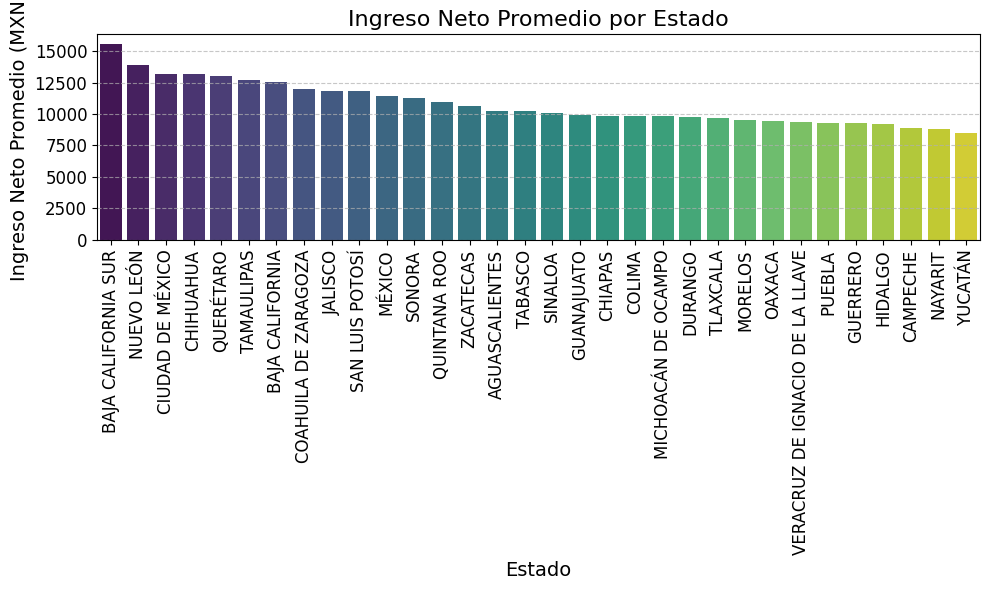

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Ciudad MX', y='Ingreso Neto Numérico', data=ingreso_promedio, palette='viridis')
plt.title('Ingreso Neto Promedio por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Ingreso Neto Promedio (MXN)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Haremos lo mismo que en el paso anterior ahora con el **porcentaje de pago**.

C:\Users\Rafael\AppData\Local\Temp\ipykernel_9756\1347068435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ciudad MX', y='Pagado', data=porcentaje_pago, palette='viridis')


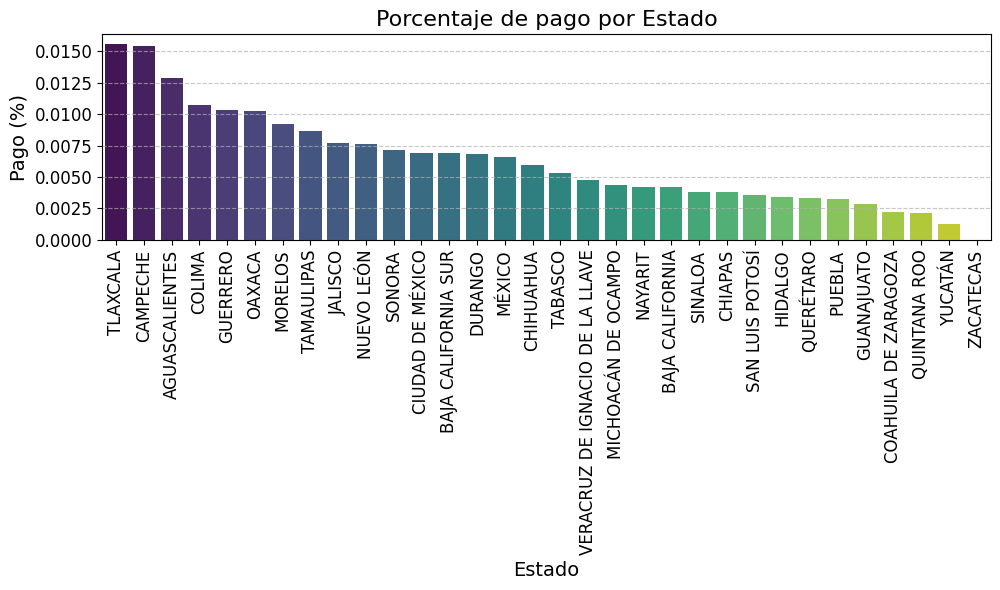

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Ciudad MX', y='Pagado', data=porcentaje_pago, palette='viridis')
plt.title('Porcentaje de pago por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Pago (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Para ver posibles dependencias entre las variables anteriores (ingreso promedio y porcentaje de pago) se crea una tabla combinada con todos **los estados**, su **ingreso promedio** y su **porcentaje de pago**:

In [21]:
tabla_combinada = pd.merge(ingreso_promedio, porcentaje_pago, on='Ciudad MX')
tabla_combinada

,Ciudad MX,Ingreso Neto Numérico,Pagado
0,BAJA CALIFORNIA SUR,15555.782690,0.006897
1,NUEVO LEÓN,13873.737295,0.007650
2,CIUDAD DE MÉXICO,13200.078692,0.006941
3,CHIHUAHUA,13179.416243,0.005917
4,QUERÉTARO,13037.371809,0.003289
5,TAMAULIPAS,12669.324759,0.008671
6,BAJA CALIFORNIA,12538.017526,0.004175
7,COAHUILA DE ZARAGOZA,11962.099167,0.002222
8,JALISCO,11862.127914,0.007711
9,SAN LUIS POTOSÍ,11793.513641,0.003552


In [22]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [23]:
import plotly.express as px
import plotly.io as pio

Mediente Plotly, ahora, veremos cómo se comportan las variables vistas anteriormente en conjunto:

In [24]:
fig = px.scatter(
    tabla_combinada,
    x='Pagado',
    y='Ingreso Neto Numérico',
    text='Ciudad MX',  # Mostrar los nombres de los estados en el gráfico
    title='Relación entre Porcentaje de Pago y Ingreso Neto Promedio',
    labels={'Porcentaje Pago Promedio': 'Porcentaje de Pago (%)',
            'Ingreso Neto Promedio': 'Ingreso Neto Promedio (MXN)'},
    template='plotly'
)

# Personalizar diseño
fig.update_traces(marker=dict(size=12, color='blue', opacity=0.8), textposition='top center')
fig.update_layout(title_font_size=18, title_x=0.5)

Luego de observar está gráfica, se puede observar que no existe una relación marcada entre el ingreso neto de cada estado y el porcentaje que tienen de pago. Estados como **Tlaxcala** y **Campeche** tienen los más altos porcentajes de pago, sin embargo son de los más bajos niveles de ingreso neto.